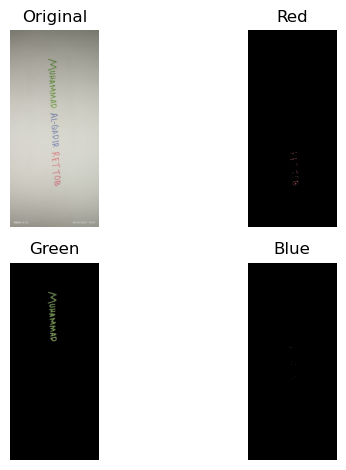

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Baca gambar
image = cv2.imread('NamaWarna.jpeg')  # Ganti dengan nama file kamu
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Konversi ke HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Rentang warna
# Merah (terbagi dua rentang di HSV)
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Hijau
lower_green = np.array([40, 40, 40])
upper_green = np.array([70, 255, 255])

# Biru
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([130, 255, 255])

# Masking
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

# Hasil deteksi
result_red = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_red)
result_green = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_green)
result_blue = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_blue)

# Tampilkan
titles = ['Original', 'Red', 'Green', 'Blue']
images = [image_rgb, result_red, result_green, result_blue]

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


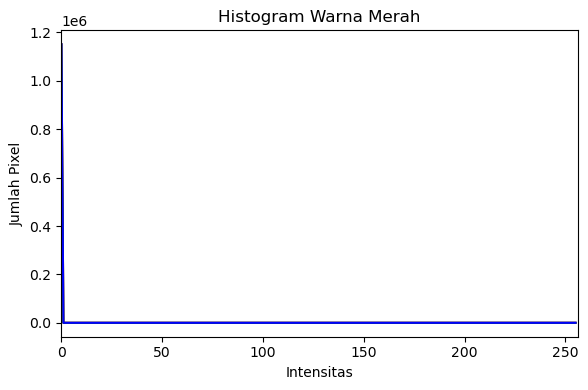

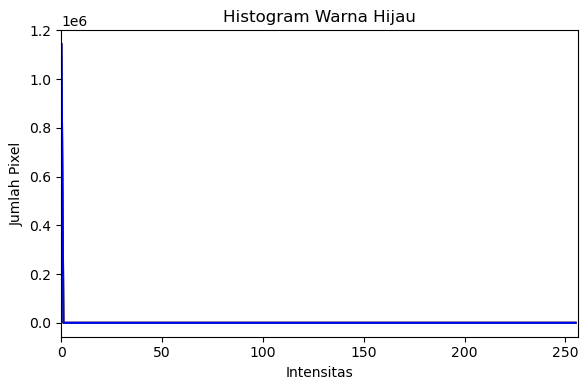

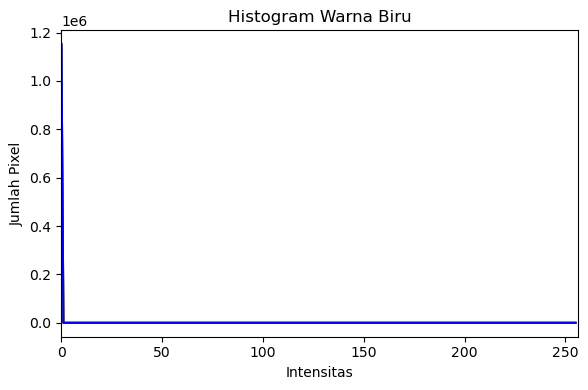

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Simulasi file path gambar
image_path = "NamaWarna.jpeg"

# Baca gambar dan konversi ke RGB
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Konversi ke HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Rentang warna HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
lower_green = np.array([40, 40, 40])
upper_green = np.array([70, 255, 255])
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([130, 255, 255])

# Masking warna
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

# Hasil deteksi warna
result_red = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_red)
result_green = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_green)
result_blue = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_blue)

# Fungsi untuk menampilkan histogram
def show_histogram(image, title):
    chans = cv2.split(image)
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.xlabel('Intensitas')
    plt.ylabel('Jumlah Pixel')
    for (chan, color) in zip(chans, colors):
        plt.plot(cv2.calcHist([chan], [0], None, [256], [0, 256]), color=color)
    plt.xlim([0, 256])
    plt.tight_layout()
    plt.show()

# Tampilkan histogram masing-masing hasil deteksi warna
show_histogram(result_red, 'Histogram Warna Merah')
show_histogram(result_green, 'Histogram Warna Hijau')
show_histogram(result_blue, 'Histogram Warna Biru')


In [7]:
# Perbaiki fungsi get_threshold_otsu untuk hanya mengembalikan nilai threshold (bukan array)
def get_threshold_otsu(mask):
    thresh_val, _ = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh_val

# Hitung ambang batas baru
threshold_red = get_threshold_otsu(mask_red)
threshold_green = get_threshold_otsu(mask_green)
threshold_blue = get_threshold_otsu(mask_blue)

# Urutkan dari terkecil ke terbesar
thresholds = {
    'Merah': threshold_red,
    'Hijau': threshold_green,
    'Biru': threshold_blue
}
sorted_thresholds = dict(sorted(thresholds.items(), key=lambda item: item[1]))

sorted_thresholds


{'Merah': 0.0, 'Hijau': 0.0, 'Biru': 0.0}

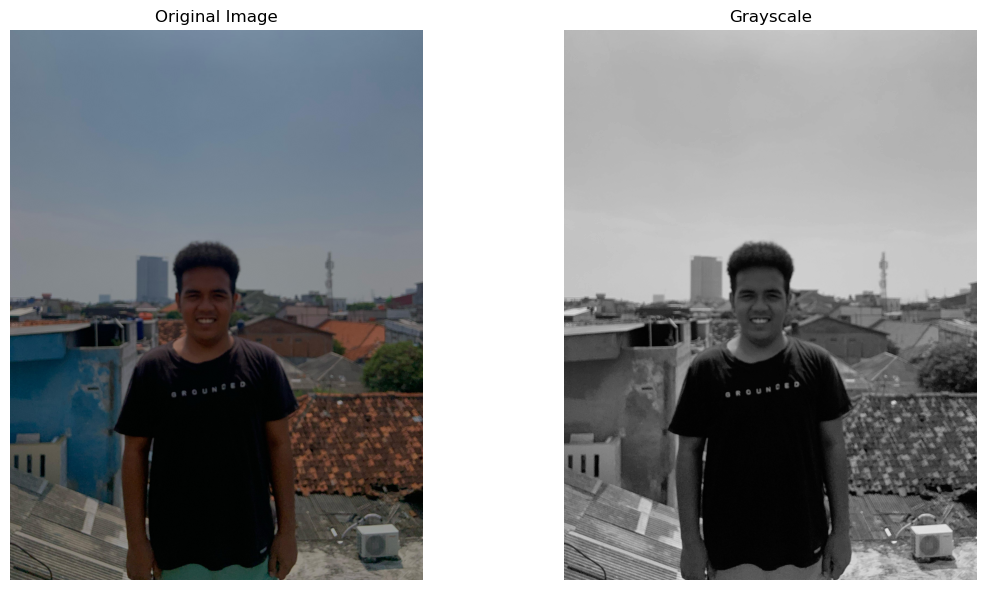

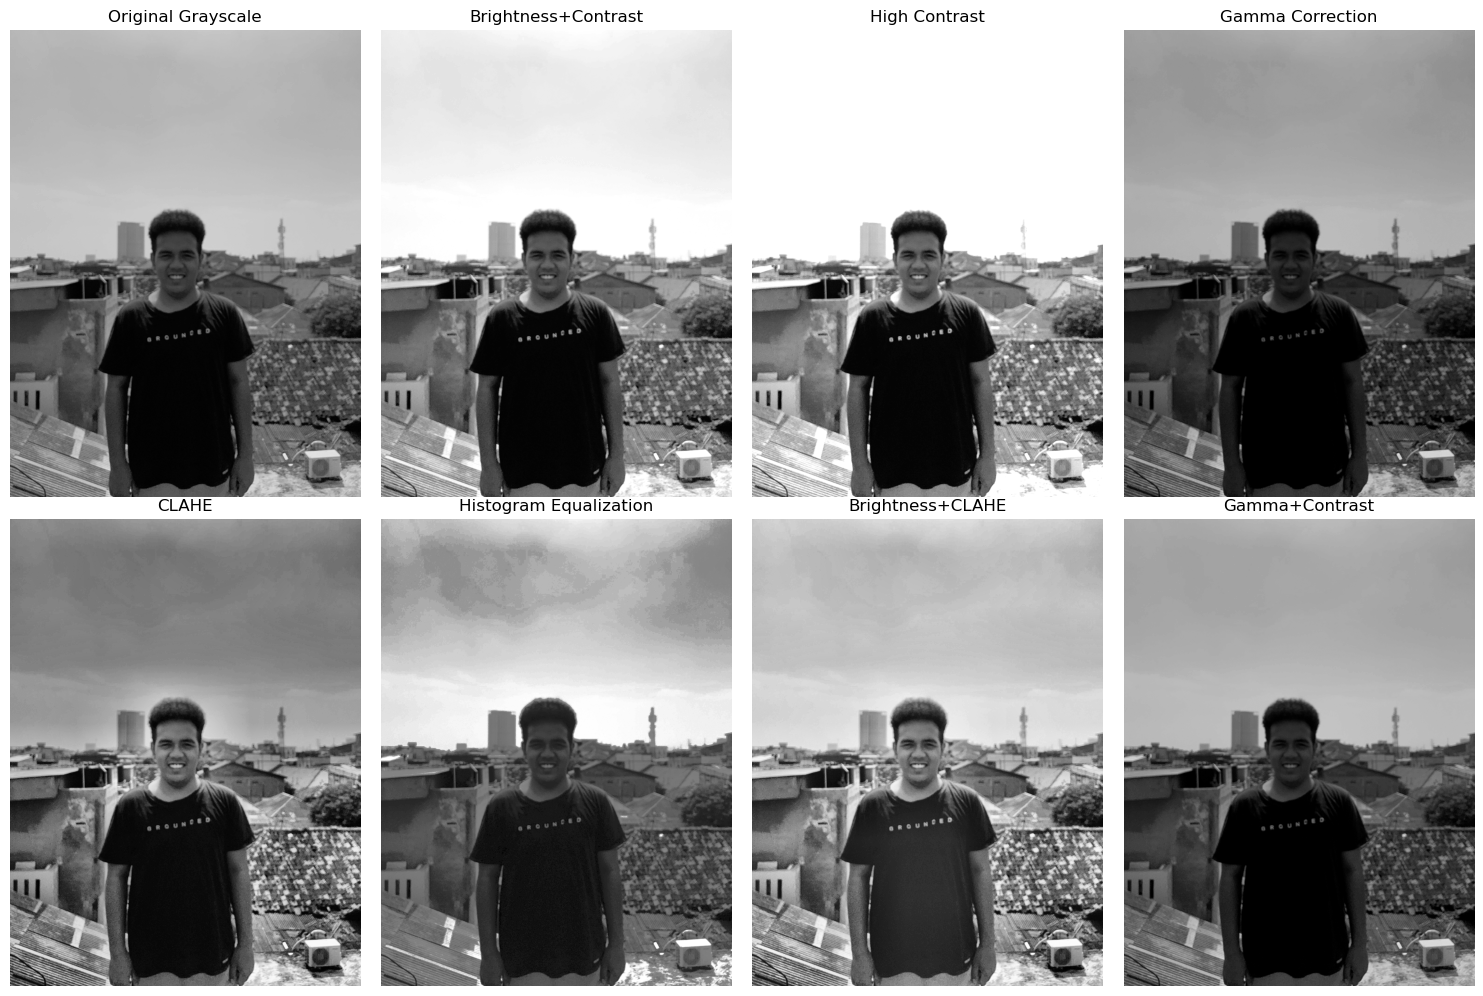

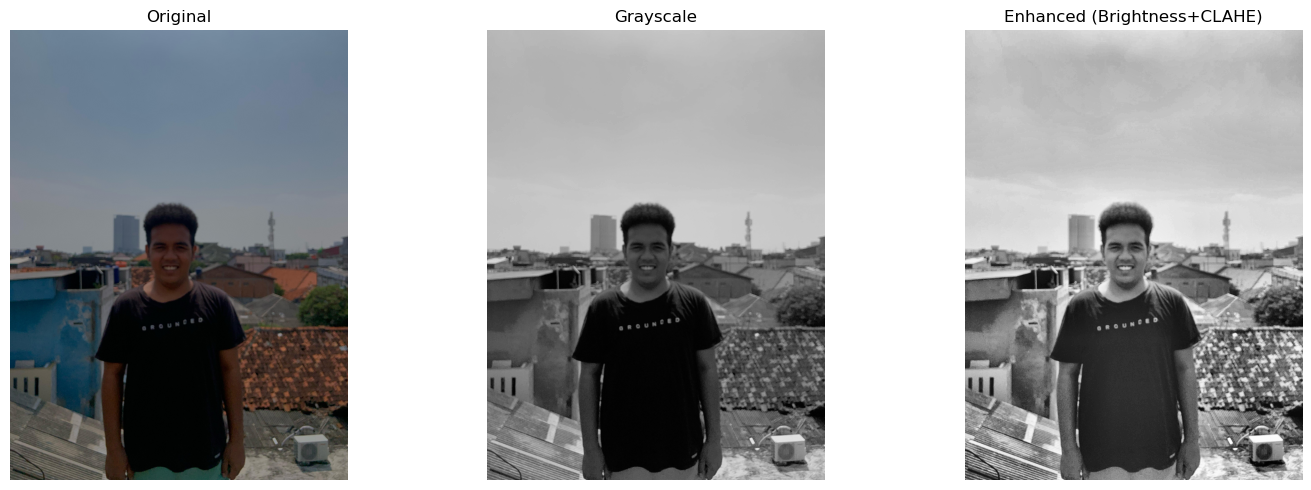

All enhanced images have been saved!


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_images(images, titles, rows=1, figsize=(15, 10)):
    """
    Function to display multiple images with their titles
    """
    cols = len(images) // rows if len(images) % rows == 0 else len(images) // rows + 1
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    
    if rows == 1 and cols == 1:
        axes.imshow(images[0], cmap='gray' if len(images[0].shape) == 2 else None)
        axes.set_title(titles[0])
        axes.axis('off')
    elif rows == 1:
        for i, (img, title) in enumerate(zip(images, titles)):
            axes[i].imshow(img, cmap='gray' if len(img.shape) == 2 else None)
            axes[i].set_title(title)
            axes[i].axis('off')
    else:
        for i, (img, title) in enumerate(zip(images, titles)):
            ax = axes[i // cols, i % cols]
            ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
            ax.set_title(title)
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

def adjust_brightness_contrast(image, alpha=1.0, beta=0):
    """
    Function to adjust brightness and contrast
    alpha: Contrast control (1.0-3.0)
    beta: Brightness control (0-100)
    """
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def gamma_correction(image, gamma=1.0):
    """
    Function to apply gamma correction
    gamma < 1 brightens the image
    gamma > 1 darkens the image
    """
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in range(256)]).astype(np.uint8)
    return cv2.LUT(image, table)

def clahe_enhancement(image, clip_limit=3.0, grid_size=(8, 8)):
    """
    Function to apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    """
    if len(image.shape) == 3:  # Color image
        lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
        cl = clahe.apply(l)
        
        limg = cv2.merge((cl, a, b))
        return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    else:  # Grayscale image
        clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
        return clahe.apply(image)

def adaptive_histogram_equalization(image):
    """
    Function to apply adaptive histogram equalization
    """
    if len(image.shape) == 3:  # Color image
        ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
        channels = cv2.split(ycrcb)
        
        # Apply CLAHE to Y channel
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        channels[0] = clahe.apply(channels[0])
        
        ycrcb = cv2.merge(channels)
        return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)
    else:  # Grayscale image
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        return clahe.apply(image)

def process_backlight_image(image_path):
    """
    Process a backlight image to enhance the subject
    """
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image from {image_path}")
        return
    
    # Convert BGR to RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Enhanced version 1: Simple brightness and contrast adjustment
    enhanced1 = adjust_brightness_contrast(gray, alpha=1.5, beta=50)
    
    # Enhanced version 2: Higher contrast adjustment
    enhanced2 = adjust_brightness_contrast(gray, alpha=2.0, beta=30)
    
    # Enhanced version 3: Gamma correction
    enhanced3 = gamma_correction(gray, gamma=0.7)
    
    # Enhanced version 4: CLAHE enhancement
    enhanced4 = clahe_enhancement(gray)
    
    # Enhanced version 5: Adaptive histogram equalization
    enhanced5 = cv2.equalizeHist(gray)
    
    # Enhanced version 6: Combined approach - increase brightness first, then apply CLAHE
    brightened = adjust_brightness_contrast(gray, alpha=1.3, beta=40)
    enhanced6 = clahe_enhancement(brightened)
    
    # Enhanced version 7: Combined approach - apply gamma correction first, then adjust contrast
    gamma_corrected = gamma_correction(gray, gamma=0.8)
    enhanced7 = adjust_brightness_contrast(gamma_corrected, alpha=1.3, beta=20)
    
    # Display original and enhanced grayscale images
    images = [gray, enhanced1, enhanced2, enhanced3, enhanced4, enhanced5, enhanced6, enhanced7]
    titles = ["Original Grayscale", "Brightness+Contrast", "High Contrast", 
              "Gamma Correction", "CLAHE", "Histogram Equalization", 
              "Brightness+CLAHE", "Gamma+Contrast"]
    
    return img_rgb, gray, enhanced1, enhanced2, enhanced3, enhanced4, enhanced5, enhanced6, enhanced7

# Main execution
image_path = "Faris.jpeg"  # Update with your image path
results = process_backlight_image(image_path)

if results:
    img_rgb, gray, enhanced1, enhanced2, enhanced3, enhanced4, enhanced5, enhanced6, enhanced7 = results
    
    # Save the enhanced images
    cv2.imwrite("Faris_gray.jpg", gray)
    cv2.imwrite("Faris_brightness_contrast.jpg", enhanced1)
    cv2.imwrite("Faris_high_contrast.jpg", enhanced2)
    cv2.imwrite("Faris_gamma.jpg", enhanced3)
    cv2.imwrite("Faris_clahe.jpg", enhanced4)
    cv2.imwrite("Faris_histeq.jpg", enhanced5)
    cv2.imwrite("Faris_brightness_clahe.jpg", enhanced6)
    cv2.imwrite("Faris_gamma_contrast.jpg", enhanced7)
    
    # Display the results
    # Original and grayscale
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Display enhanced versions
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 4, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Grayscale")
    plt.axis('off')
    
    plt.subplot(2, 4, 2)
    plt.imshow(enhanced1, cmap='gray')
    plt.title("Brightness+Contrast")
    plt.axis('off')
    
    plt.subplot(2, 4, 3)
    plt.imshow(enhanced2, cmap='gray')
    plt.title("High Contrast")
    plt.axis('off')
    
    plt.subplot(2, 4, 4)
    plt.imshow(enhanced3, cmap='gray')
    plt.title("Gamma Correction")
    plt.axis('off')
    
    plt.subplot(2, 4, 5)
    plt.imshow(enhanced4, cmap='gray')
    plt.title("CLAHE")
    plt.axis('off')
    
    plt.subplot(2, 4, 6)
    plt.imshow(enhanced5, cmap='gray')
    plt.title("Histogram Equalization")
    plt.axis('off')
    
    plt.subplot(2, 4, 7)
    plt.imshow(enhanced6, cmap='gray')
    plt.title("Brightness+CLAHE")
    plt.axis('off')
    
    plt.subplot(2, 4, 8)
    plt.imshow(enhanced7, cmap='gray')
    plt.title("Gamma+Contrast")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Compare original with best enhanced version (subjectively chosen)
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(enhanced6, cmap='gray')  # Choose the best enhancement method
    plt.title("Enhanced (Brightness+CLAHE)")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("All enhanced images have been saved!")